<a href="https://colab.research.google.com/github/SmayanKulkarni/AI-and-ML-Course/blob/master/ML_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,8)  # Ensures all figures are created with a default size of 10 inches wide and 8 inches high.

Load Dataset

In [61]:
data = pd.read_csv('/content/Food_Truck_Data.csv')
data.head(5)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


Visualise Dat

Text(0.5, 1.0, 'Population Vs Profit')

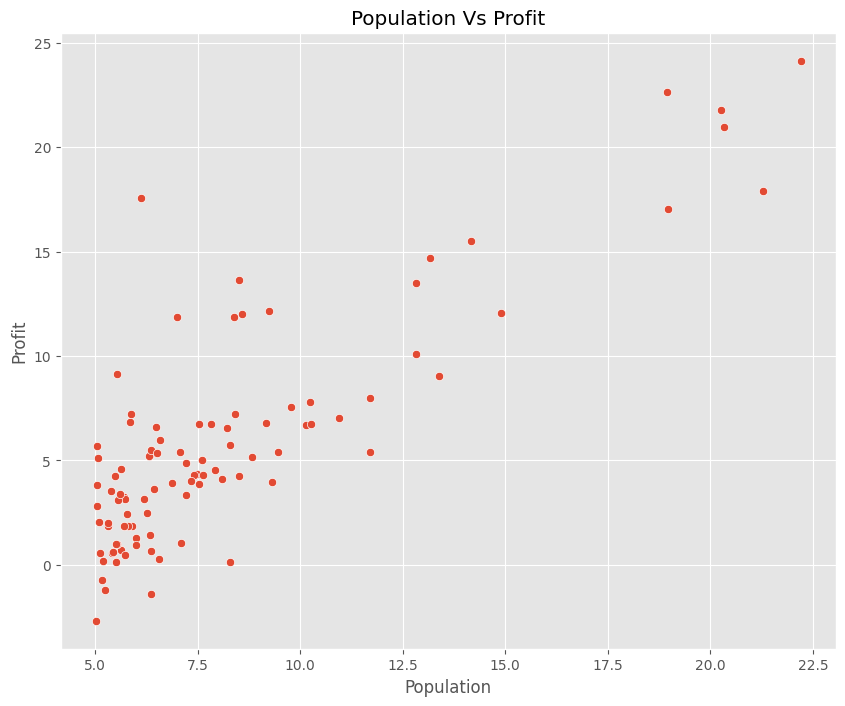

In [63]:
ax = sns.scatterplot(x = "Population", y = "Profit", data = data)
ax.set_title("Population Vs Profit")

Compute Cost [theta]

In [64]:
def cost_function(X, y, theta):
  """
   len = number of training examples.
   X feature map, theta= weights , Matrix multiplication to get predictions
  """
  m = len(y)
  y_pred = X.dot(theta)
  error = (y_pred - y) ** 2 # Calculates squared differences between predicted and actual values.

  return 1/ (2*m) * np.sum(error) #Summing the error ensures we account for all data points.




In [65]:
m = data.Population.size
X = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis=1)
y = data.Profit.values.reshape (m, 1) # Extracts Profit values as a column vector
theta = np.zeros((2, 1)) #Initializes the parameters θ (weights) as zeros. ensures we start with no bias towards any particular value.
#The gradient descent algorithm will adjust θ properly based on the data.

cost_function (X, y, theta)

32.072733877455676

Gradient Descent

In [66]:
def gradient_descent(X, y, theta, alpha, iterations):
  """
    #X → Feature matrix (input data, including bias term).
    #y → Target values (actual outputs).
    #theta → Model parameters (weights) initialized to zeros.
    #alpha → Learning rate (step size for updates).
    #costs = [] → Stores the cost at each iteration for monitoring convergence.
  """
  m = len(y)
  costs =[]
  for i in range(iterations):
    y_pred = X.dot(theta)
    error = np.dot(X.transpose(), (y_pred - y))
    theta -= alpha * 1/m *error
    costs.append(cost_function(X, y, theta))
  return theta, costs



In [67]:
theta, costs = gradient_descent(X, y, theta, alpha =0.01, iterations=10)    #Runs gradient descent for 10 iterations, Stores the optimized theta values and cost history after 10 iterations.

print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)), str(round(theta[1, 0], 2))))

h(x) = 0.01 + 0.8x1


Visualising Cost Function

In [68]:
from mpl_toolkits.mplot3d import Axes3D

In [69]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
  for j in range(len(theta_1)):
    t = np.array([theta_0[i], theta_1[j]])

    cost_values[i,j] = cost_function(X,y,t)

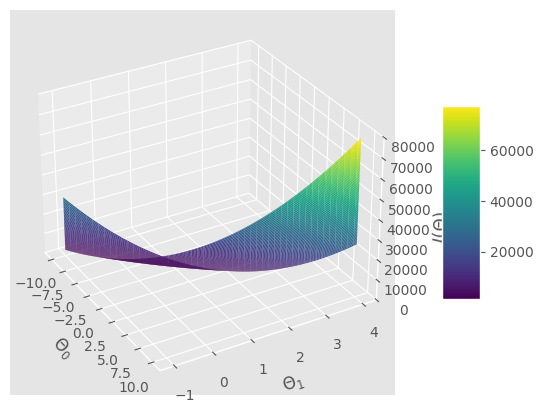

In [70]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, projection='3d')  # Use Axes3D

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap="viridis")
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\\Theta_0$")
plt.ylabel("$\\Theta_1$")
ax.set_zlabel("$J(\\Theta)$")

ax.view_init(30, 330)

plt.show()

Plotting Convergence of JTheta

Text(0.5, 1.0, 'Values of cost function over iterations of gradient descent')

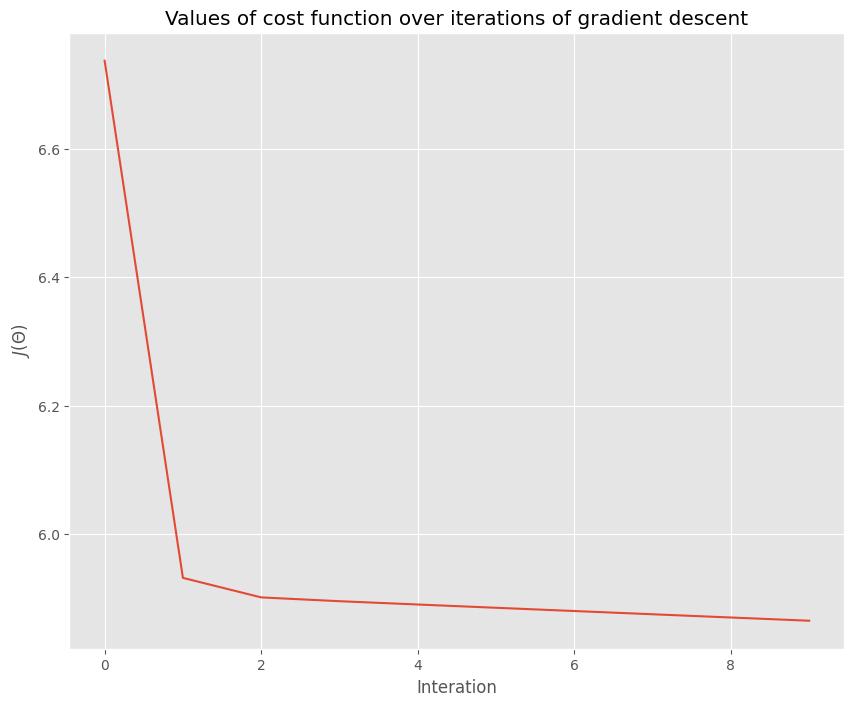

In [71]:
plt.plot(costs)
plt.xlabel("Interation")
plt.ylabel("$J(\Theta)$")
plt.title("Values of cost function over iterations of gradient descent")

training data

In [72]:
theta.shape

(2, 1)

In [73]:
theta

array([[0.0086469],
       [0.8007915]])

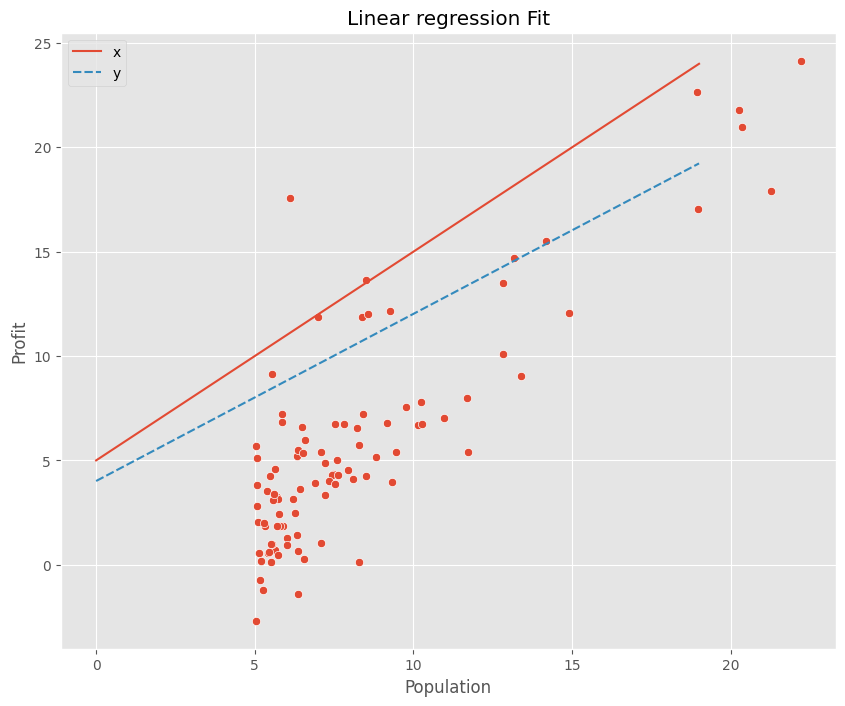

In [74]:
theta = np.squeeze(theta)

sns.scatterplot(x = "Population", y = "Profit", data = data)

x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]

sns.lineplot(data=pd.DataFrame({"x": x_value, "y": y_value}))

plt.xlabel("Population")
plt.ylabel("Profit")
plt.title("Linear regression Fit");

Inference using optimised theta

In [75]:
def predict(x, theta):
  y_pred = np.dot(theta.transpose(), x)
  return y_pred

In [76]:
y_pred_1 = predict(np.array([1, 4]), theta)*10000
y_pred_1

32118.128896652208

In [77]:
y_pred_2 = predict(np.array([1, 8.3]), theta)*10000
y_pred_2

66552.16332609253

#Linear regression using libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
import warnings
warnings.filterwarnings("ignore")

In [80]:
dataset=pd.read_csv("/content/home_data.csv")
dataset.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [81]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [82]:
dataset.nunique()

,0
id,21436
date,372
price,4032
bedrooms,13
bathrooms,30
sqft_living,1038
sqft_lot,9782
floors,6
waterfront,2
view,5


In [83]:
dataset.shape

(21613, 21)

In [84]:
dataset.isna().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [85]:
col_to_be_used = ["price", "bedrooms","bathrooms", "sqft_living", "condition", "floors", "waterfront", "view"]
dataset1 = dataset[col_to_be_used]
dataset1.head()

,price,bedrooms,bathrooms,sqft_living,condition,floors,waterfront,view
0,221900,3,1.00,1180,3,1.0,0,0
1,538000,3,2.25,2570,3,2.0,0,0
2,180000,2,1.00,770,3,1.0,0,0
3,604000,4,3.00,1960,5,1.0,0,0
4,510000,3,2.00,1680,3,1.0,0,0


Split dataset into Train and Test sets

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X= dataset1.drop('price', axis=1)
y=dataset1['price']

In [88]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size =0.3, random_state=2)

Fit the Model

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
reg = LinearRegression().fit(train_X, train_y )

In [91]:
reg.score(test_X, test_y)

0.5789818453493356

In [92]:
reg.score(train_X, train_y)

0.5595424526590569

Lasso Regression

In [93]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(train_X, train_y)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [94]:
lasso_reg.score(test_X, test_y)

0.578825731206807

In [95]:
lasso_reg.score(train_X, train_y)

0.5595394213987006

Ridge Regression

In [96]:
from sklearn import linear_model
Ridge_reg = linear_model.Ridge(alpha=50, max_iter=100, tol=0.1)
Ridge_reg.fit(train_X, train_y)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [97]:
Ridge_reg.score(test_X, test_y)

0.5743133478889296

In [98]:
Ridge_reg.score(train_X, train_y)

0.5582249126294089

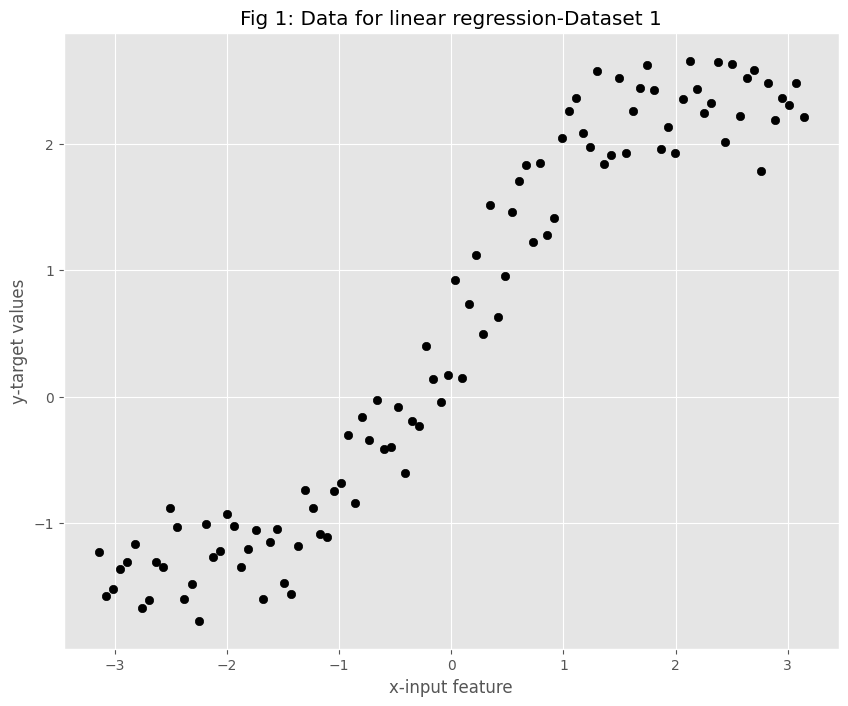

In [99]:
import numpy as np
import matplotlib.pyplot as plt
number_of_samples = 100
x = np.linspace(-np.pi, np.pi, number_of_samples)
y = 0.5*x + np.sin(x) + np.random.random(x.shape)
plt.scatter(x, y, color='black')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 1: Data for linear regression-Dataset 1')
plt.show()

In [100]:
X = np.column_stack((np.ones_like(x), x))
theta = np.zeros(2)
def hypothesis(X, theta):
  return np.dot(X, theta)
def cost_function(X, y, theta):
  m = len(y)
  h = hypothesis(X, theta)
  return (1 / (2 * m)) * np.sum((h - y)**2)
def gradient_descent(X, y, theta, alpha, num_iterations):
  m = len(y)
  cost_history = []

  for _ in range(num_iterations):
    h = hypothesis(X, theta)
    gradient = (1 / m) * np.dot(X.T, (h - y))
    theta -= alpha * gradient
    cost = cost_function(X, y, theta)
    cost_history.append(cost)
  return theta, cost_history
alpha = 0.01
num_iterations = 1000

theta, cost_history = gradient_descent(X, y, theta, alpha, num_iterations)

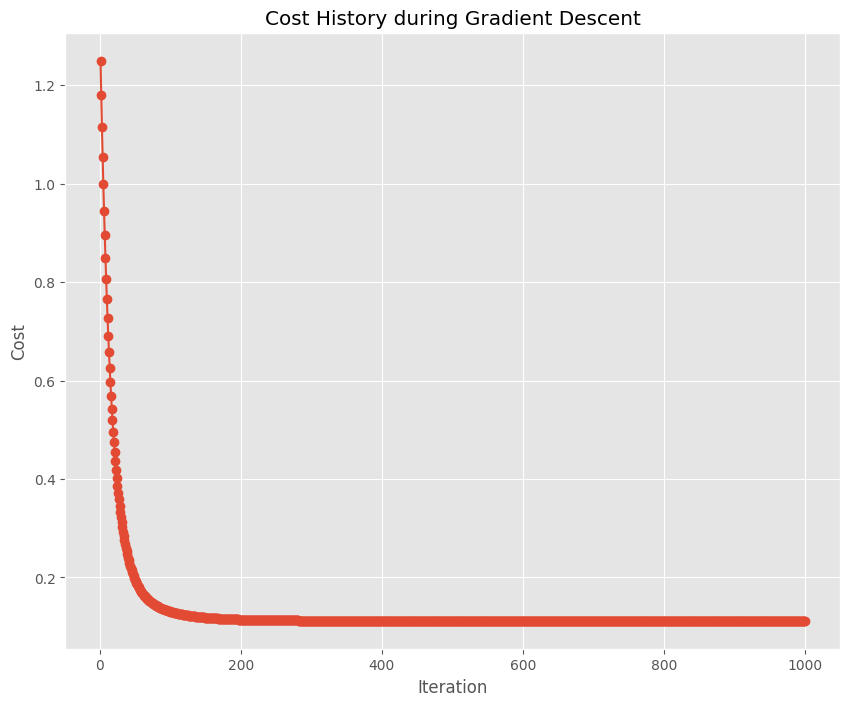

In [101]:
# Plot the cost history
plt.plot(range(1, num_iterations + 1), cost_history, marker='o')
plt.title('Cost History during Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)
plt.show()


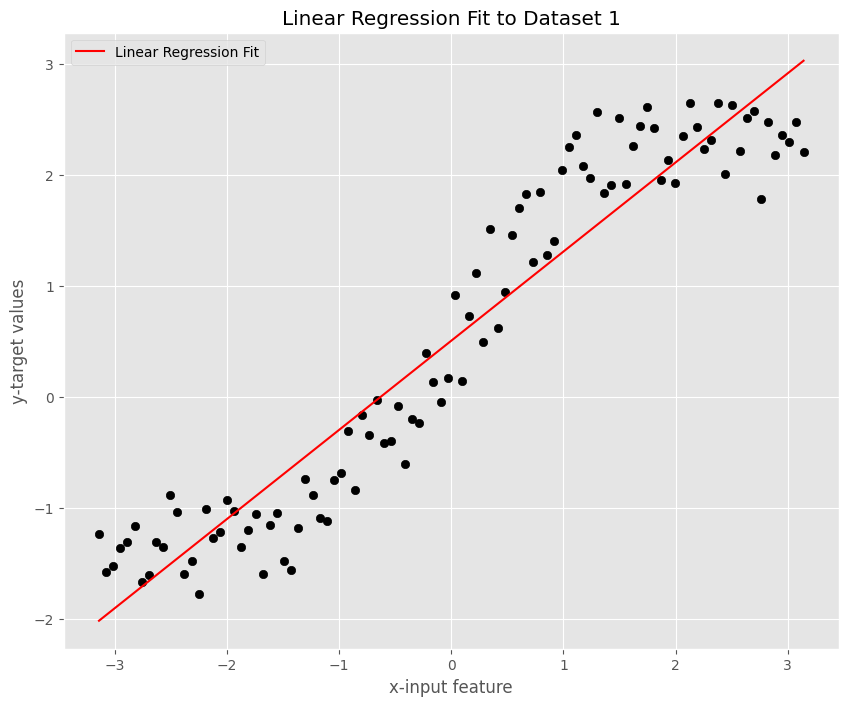

In [102]:
plt.scatter(x, y, color='black') # Plot y-vs-x in dots
plt.plot(x, hypothesis(X, theta), color='red', label='Linear Regression Fit')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Linear Regression Fit to Dataset 1')
plt.legend()
plt.show()

In [103]:
import pandas as pd
number_of_samples = 100
x = np.linspace(-np.pi, np.pi, number_of_samples)
y = 0.5 * x + np.sin(x) + np.random.random(x.shape)
df_1= pd.DataFrame({'x': x, 'y': y})
df_1.to_csv('sine_curve.csv', index=False)

In [104]:
import pandas as pd
df_1 = pd.read_csv('/content/sine_curve.csv')
x = df_1['x']
y = df_1['y']

In [105]:
df_1.head()


,x,y
0,-3.141593,-1.198501
1,-3.078126,-0.790770
2,-3.014660,-0.941146
3,-2.951193,-0.692442
4,-2.887727,-1.604017


In [106]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [107]:
from sklearn.model_selection import train_test_split

In [108]:
dataset_1= pd.read_csv('/content/sine_curve.csv')
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)

In [109]:
import pandas as pd
from sklearn.linear_model import LinearRegression
sine_reg = LinearRegression().fit(train_X, train_y)

In [110]:

score = sine_reg.score(train_X, train_y)
print("R-squared score for training dataset of Sine function:", score)

R-squared score for training dataset of Sine function: 0.8800092918638357


In [111]:
score = sine_reg.score(test_X, test_y)
print("R-squared score for testing dataset of Sine function:", score)

R-squared score for testing dataset of Sine function: 0.8451350777796678
